In [2]:
import os
import numpy as np
import pandas as pd
import scipy
import sklearn as sk
import matplotlib.pyplot as plt
%matplotlib inline


In [5]:
os.listdir('../data')

['.DS_Store', 'training_set.csv', 'training_set_metadata.csv']

In [6]:
train = pd.read_csv('../data/training_set.csv')
train_meta = pd.read_csv('../data/training_set_metadata.csv')

In [14]:
print('Columns for training set:\n{}\n'.format(list(train.columns)))
print('Columns for trainint metadata:\n{}'.format(list(train_meta.columns)))

Columns for training set:
['object_id', 'mjd', 'passband', 'flux', 'flux_err', 'detected']

Columns for trainint metadata:
['object_id', 'ra', 'decl', 'gal_l', 'gal_b', 'ddf', 'hostgal_specz', 'hostgal_photoz', 'hostgal_photoz_err', 'distmod', 'mwebv', 'target']


### Can I Observe an Object on This Day?
<p>MJD vs. right ascension / declination</p>

<p>In principle, there should be a relationship between the large data gaps and the position of the object in the sky. So we should be able to come up a formula on when we expect the object to disappear/reappear in the LSST sky.</p>

<p>Note, the LSST appears at:<br/>
(Latitude, Longitude) = -30.2399323736 -70.7429636948
</p>

<p>We can technically use this to compute the observability of an object on any given day (MJD). This doesn't mean it WILL be observed, but it can give us a way to construct a map, with which we can do computations</p>

<p>Or, we could go ahead, and try to learn a relationship with machine learning...</p>

In [15]:
# Want 'ra' and 'decl' of an object id. Also need object_id and flux

There are 352 observations


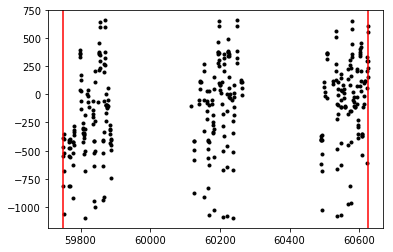

In [34]:
obj_id = train['object_id'].iloc[0]
# plot the flux vs mjd

filt = train['object_id'] == obj_id
cols = ['mjd', 'flux']
data = train.loc[filt]

print('There are {} observations'.format(len(data)))
# plt.scatter(data['mjd'], data['flux'], marker='.', c='black')

# # The beginning and end
# plt.axvline(data['mjd'].min(), linestyle='-', c='red')
# plt.axvline(data['mjd'].max(), linestyle='-', c='red')


<p>We see that the gaps appear as such -- just NO data. We can go through, and get the START and STOP time of these observation intervals. We'll use the same data from this plot.</p>

In [35]:
# How many observations at the very first day?
data.head(10)

,object_id,mjd,passband,flux,flux_err,detected
0,615,59750.4229,2,-544.810303,3.622952,1
1,615,59750.4306,1,-816.434326,5.553370,1
2,615,59750.4383,3,-471.385529,3.801213,1
3,615,59750.4450,4,-388.984985,11.395031,1
4,615,59752.4070,2,-681.858887,4.041204,1
5,615,59752.4147,1,-1061.457031,6.472994,1
6,615,59752.4224,3,-524.954590,3.552751,1
7,615,59752.4334,4,-393.480225,3.599346,1
8,615,59752.4435,5,-355.886780,10.421921,1
9,615,59767.2968,2,-548.013550,3.462291,1


<p>For each night, we get more than one observation, because we have a number of passbands. Each passband gives us different information. Unfortunately, we don't have every passband for every night.</p>

In [40]:
# Index for which there is a large jump
large_gap = []
for i in range(len(data) - 2):
    if (data['mjd'].iloc[i + 1] - data['mjd'].iloc[i] > 31):
        large_gap.append(i)

In [41]:
large_gap

[121, 230]

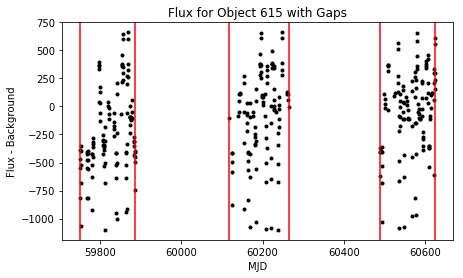

In [66]:
fig = plt.figure(figsize=(7,4))
ax = fig.add_subplot(111)

ax.scatter(data['mjd'], data['flux'], marker='.', c='black')

# The beginning and end
ax.axvline(data['mjd'].min(), linestyle='-', c='red')
ax.axvline(data['mjd'].max(), linestyle='-', c='red')
for index in large_gap:
    ax.axvline(data['mjd'].iloc[index], linestyle='-', c='red')
    ax.axvline(data['mjd'].iloc[index + 1], linestyle='-', c='red')
    
ax.set_xlabel('MJD')
ax.set_ylabel('Flux - Background')
ax.set_title('Flux for Object {} with Gaps'.format(obj_id))

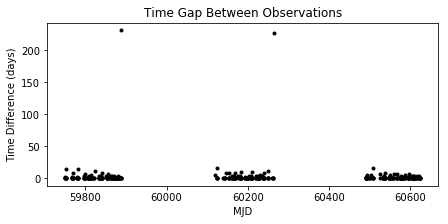

In [64]:
x = data['mjd'][:-1]
time_diff = np.array(data['mjd'])[1:] - np.array(data['mjd'])[:-1]

fig = plt.figure(figsize=(7,3))
ax = fig.add_subplot(111)
ax.scatter(x, time_diff, marker='.', c='black')
ax.set_xlabel('MJD')
ax.set_ylabel('Time Difference (days)')
ax.set_title('Time Gap Between Observations')